<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week13.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Two-body problems, gravitational forces and discussion of second midterm -->

# PHY321: Two-body problems, gravitational forces and discussion of second midterm
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info)**, Department of Physics and Astronomy and Facility for Rare Isotope Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **April 3-7**

## Aims and Overarching Motivation

### Monday April 3

1. Physical interpretation of various orbit types and summary gravitational forces

2. Second midterm available Monday April 3, deadline April 16 at midnight.

  * [Video of lecture](https://youtu.be/HwaxZFeJ4eg)

  * [Handwritten notes](https://github.com/mhjensen/Physics321/blob/master/doc/HandWrittenNotes/Spring2023/NotesApril3.pdf)

Look up for example the README file at <https://github.com/mhjensen/Physics321/blob/master/README.md> for an update on solutions to various assignments.

**Reading suggestion**: Taylor chapter 8 and Lecture notes as well handwritten notes from this Monday. These notes are also relevant for the second midterm and later also (after the deadline for the second midterm) homework 9.

### Wednesday April 5

1. Discussion of second midterm, hints and tips and Kepler orbit analysis

  * [Video of Lecture TBA](https://youtu.be/xnMIkLE_rzM)

  * [Handwritten notes](https://github.com/mhjensen/Physics321/blob/master/doc/HandWrittenNotes/Spring2022/NotesApril5.pdf)  

**Reading suggestion**: Taylor chapter 8 and lecture notes

### Friday April 7

1. Work on second midterm, hints and tips

  * [Hints and tips for second midterm, video of lecture TBA](https://youtu.be/_JZbimHBwSI)

  * [Handwritten notes](https://github.com/mhjensen/Physics321/blob/master/doc/HandWrittenNotes/Spring2022/NotesApril7.pdf)

### Code example with gravitional force

The code example here is meant to illustrate how we can make a plot of
the final orbit. We solve the equations in polar coordinates (the
example here uses the minimum of the potential as initial value) and
then we transform back to cartesian coordinates and plot $x$ versus
$y$. We see that we get a perfect circle when we place ourselves at
the minimum of the potential energy, as expected.

## Plotting the potential first

The code here plots the effective potential

The following code plots this effective potential for a simple choice of parameters, with a standard gravitational potential $-\alpha/r$. Here we have chosen $L=m=\alpha=1$.

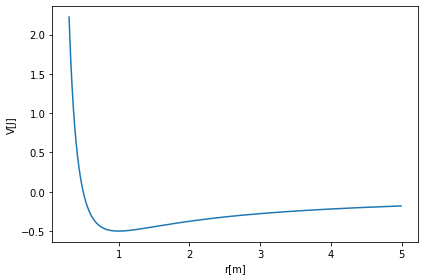

In [1]:
%matplotlib inline

# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.3
xfinal = 5.0
alpha = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = -alpha/x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

## Solving the differential equations, Radial Degrees of Freedom only

This code and the subsequent one are relevant for homework 9 (the numerical exercise).

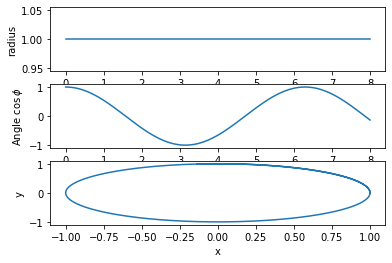

In [2]:

# Simple Gravitational Force   -alpha/r
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


    
DeltaT = 0.01
#set up arrays 
tfinal = 8.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
phi = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
alpha = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/alpha)
# Initial conditions, place yourself at the potential min
r0 = rmin
v0 = 0.0  # starts at rest
r[0] = r0
v[0] = v0
phi[0] = 0.0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -alpha/(r[i]**2)+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -alpha/(r[i+1]**2)+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    phi[i+1] = t[i+1]*c2/(r0**2)
# Find cartesian coordinates for easy plot    
x = r*np.cos(phi)
y = r*np.sin(phi)
fig, ax = plt.subplots(3,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Angle $\cos{\phi}$')
ax[1].plot(t,np.cos(phi))
ax[2].set_ylabel('y')
ax[2].set_xlabel('x')
ax[2].plot(x,y)

save_fig("Phasespace")
plt.show()

## Changing initial conditions

Try to change the initial value for $r$ and see what kind of orbits you get.
In order to test different energies, it can be useful to look at the plot of the effective potential discussed above.

However, for orbits different from a circle the above code would need modifications in order to allow us to display say an ellipse. For the latter, it is much easier to run our code in cartesian coordinates, as done here. In this code we test also energy conservation and see that it is conserved to numerical precision. The code here is a simple extension of the code we developed for homework 5.

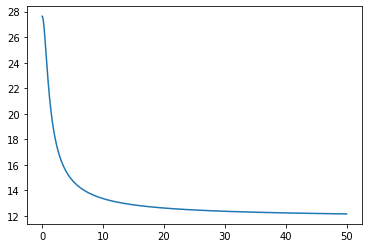

In [23]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

DeltaT = 0.00001
#set up arrays 
tfinal = 50.0
n = ceil(tfinal/DeltaT)
# set up arrays
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
E = np.zeros(n)
# Constants of the model
m = 1.0   # mass, you can change these
alpha = 4*(np.pi**2)
# Initial conditions as compact 2-dimensional arrays
x0 = 5.0; y0= 0.
r0 = np.array([x0,y0]) 
v0 = np.array([0.0,2*np.pi])
r[0] = r0
v[0] = v0
rabs = sqrt(sum(r[0]*r[0]))
E[0] = 0.5*m*(v[0,0]**2+v[0,1]**2)+alpha/rabs
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -alpha*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -alpha*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    E[i+1] = 0.5*m*(v[i+1,0]**2+v[i+1,1]**2)+alpha/rabs
    t[i+1] = t[i] + DeltaT
# Plot position as function of time
plt.plot(t,E)
save_fig("2DimGravity")
plt.show()


## Different Potential

Let us now try another potential, given by

$$
V(r) = \beta r,
$$

where $\beta$ is constant we assume is larger than zero. This type of potential has played an importan role in modeling confinement of quarks in non-relativistic models for the interactions among quarks, see for example <https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.44.1369> 

Adding the angular momentum part, we obtain the effective potential

$$
V_{\mathrm{eff}}(r) = \beta r+\frac{L^2}{2\mu r^2},
$$

and taking the derivative with respect to $r$, we get the radial force

$$
F_r=-\frac{dV_{\mathrm{eff}}(r)}{dr} = -\beta+\frac{L^2}{\mu r^3}.
$$

It gives us in turn a radial acceleration $a_r$

$$
a_r= -\frac{\beta}{\mu}+\frac{L^2}{\mu^2 r^3}.
$$

This is the equation we need to include in our code. I have not been able to find out if there is an analytical solution to the above equation. If you can find one, there is a reward of $50$ USD to the first one who finds. Numerically life is very easy, we just define a new acceleration, as seen below.

## Plotting the Effective Potential

First however, we plot the effective potential in order to get a feeling of what we may expect.

The following code plots this effective potential for a simple choice of parameters, with a potential $\beta r $. Here we have chosen $L=m=\beta=1$.

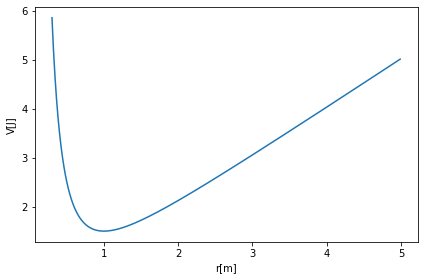

In [4]:
# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.3
xfinal = 5.0
beta = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = beta*x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

## Finding the Minimum for Circular Orbits

We take now the derivative of the effective potential in order to find its minimum, that is

$$
\frac{dV_{\mathrm{eff}}(r)}{dr} = \beta-\frac{L^2}{\mu r^3}=0,
$$

which gives us $r_{\mathrm{min}}$

$$
r_{\mathrm{min}}=\left [\frac{L^2}{\beta \mu}\right ]^{1/3}.
$$

With the above choice of parameters this gives $r_{\mathrm{min}}=1$. 

In the code here we solve the equations of motion and find the time-evolution of the radius $r$.

## Numerical Studies

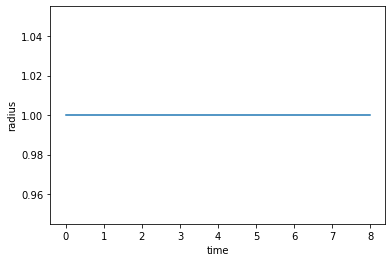

In [5]:
DeltaT = 0.01
#set up arrays 
tfinal = 8.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
beta = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/beta)**(1./3.)
# Initial conditions, place yourself at the potential min
r0 = rmin
v0 = 0.0  # starts at rest
r[0] = r0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -beta+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -beta+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
#plotting
plt.xlabel('time')
plt.ylabel('radius')
plt.plot(t,r)
save_fig("LinearPotential")
plt.show()

We see that if we run with the initial condition corresponding to a circular orbit, our radius stays constant as function of time.